# Multiple Linear Regression
## Demand for Bike Sharing

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock". This bike can then be returned to another dock belonging to the same system.

The bike-sharing companuy want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes?
- How well those variables describe the bike demands?

#### Business Goal:
Building a model for the demand for shared bikes with the available independent variables. The model will be used to understand the demand dynamics of a new market. 

## Part 1:  Data Understanding, Preparation, and EDA

### 1.1. Reading and Understanding the Data

#### -- Import NumPy and Pandas and read the dataset

In [3]:
import numpy as np
import pandas as pd

In [4]:
bikeSharing = pd.read_csv("day.csv")
#print(bikeSharing)

#### -- General Understanding of data and Inspect the various aspects of the dataframe

In [5]:
# Check the head of the dataset
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#checking the data shape
bikeSharing.shape

(730, 16)

In [7]:
#checking the data detailed information
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### -- Data Cleaning

In [8]:
# Drop the Columns that are not useful: "instant"，“dteday”, "casual"，“registered”
bikeSharingCleaned = bikeSharing.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bikeSharingCleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 1.2. Visualising the Data

In [9]:
# Visualise our data using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#### -- Visualising Numeric Variables

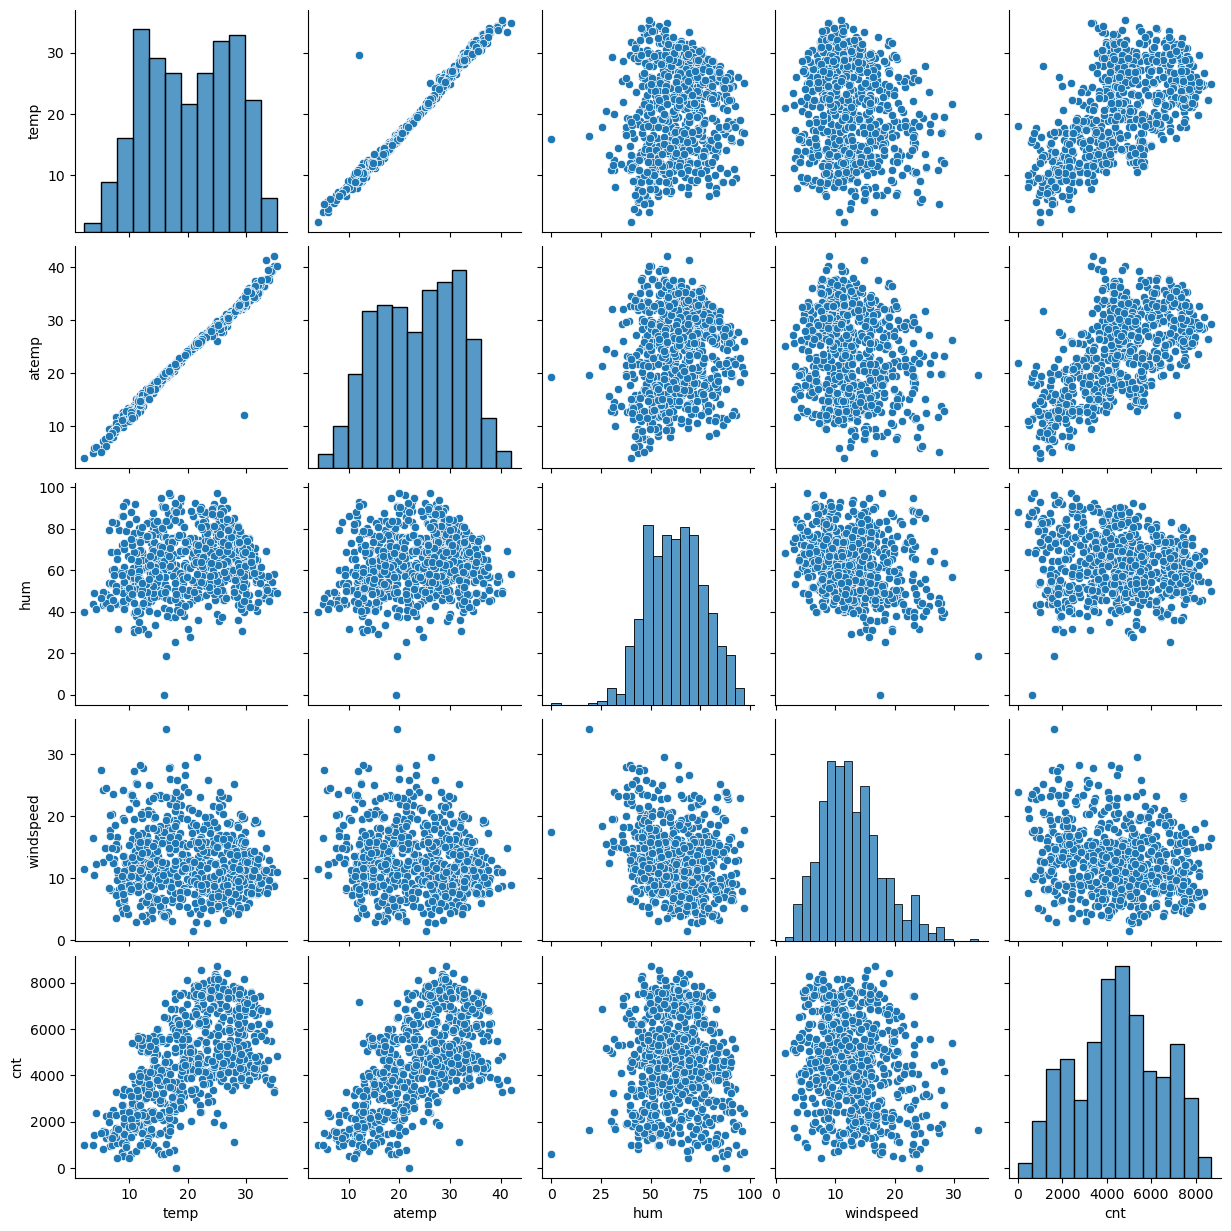

In [17]:
# Column "temp", "atemp","hum", "windspeed" are numeric variables, according to the data dictionary.
# Make a pairplot of all the numeric variables. 

# List of numerical column names
numerical_columns = ['temp', 'atemp', 'hum','windspeed', 'cnt']

# Create a DataFrame with only the numerical columns
bikeSharingCleaned_numerical = bikeSharingCleaned[numerical_columns]

# Use pairplot to visualize pairwise relationships
sns.pairplot(bikeSharingCleaned_numerical)
plt.show()

#### -- Visualising Categorical Variables

In [18]:
# Column "season", "yr","mnth", "holiday", "weekday", "workingday", "weathersit" are categorical variables

In [19]:
# Mapping the "season", "mnth", "weekday", "weathersit" categorical variables into string with Mapping dictionary

In [20]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Mapping dictionary of column 'season'
mapping_dict_season = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter',
}
bikeSharingCleaned.loc[:, 'season'] = bikeSharingCleaned['season'].replace(mapping_dict_season)
bikeSharingCleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# Mapping dictionary of column 'mnth'
mapping_dict_mnth = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
bikeSharingCleaned.loc[:, 'mnth'] = bikeSharingCleaned['mnth'].replace(mapping_dict_mnth)
bikeSharingCleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# Mapping dictionary of column 'weekday'
mapping_dict_weekday = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
}
bikeSharingCleaned.loc[:, 'weekday'] = bikeSharingCleaned['weekday'].replace(mapping_dict_weekday)
bikeSharingCleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Mapping dictionary of column 'weathersit'
mapping_dict_weathersit = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light',
    4: 'Heavy',
}

# Convert integer values to string names using .loc indexer
bikeSharingCleaned.loc[:, 'weathersit'] = bikeSharingCleaned['weathersit'].replace(mapping_dict_weathersit)
bikeSharingCleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


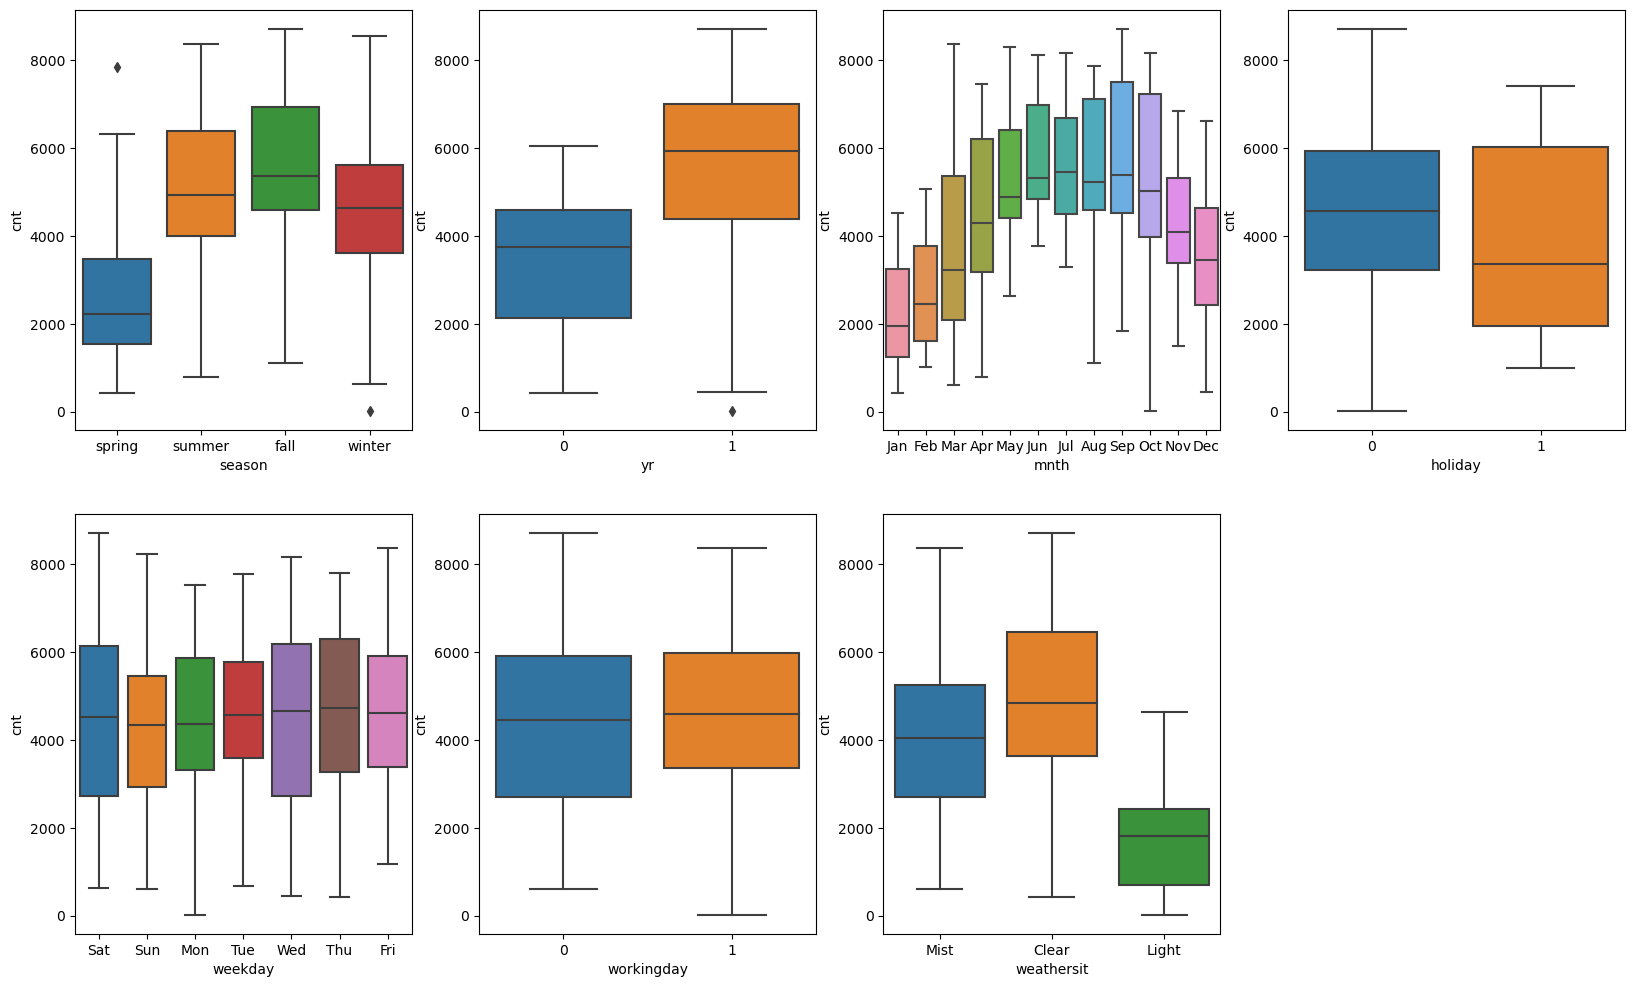

In [25]:
# Make boxplots for categorical variables
# Draw box plots for each categorical column
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharingCleaned)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharingCleaned)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharingCleaned)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharingCleaned)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharingCleaned)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharingCleaned)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharingCleaned)
plt.show()

### 1.3. Data Preparation

#### -- Dummy Variables

In [26]:
# Get the dummy variables for "season", "mnth", "weekday", "weathersit"
# Store dummy variables in new variables - "season_status", "mnth_status", "weekday_status", "weathersit_status"
import pandas as pd

In [27]:
# Get the dummy variables for 'season'
season_status = pd.get_dummies(bikeSharingCleaned['season'], drop_first = True)
# Check what the dataset 'status' looks like
season_status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Drop the 'fall' column, as the 'season' can be identified with 3 columns where — 
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `000` will correspond to `fall`
- `001` will correspond to `winter`

In [28]:
# Add the results to the original dataframe
bikeSharingCleaned = pd.concat([bikeSharingCleaned, season_status], axis = 1)
bikeSharingCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
dtypes: float64(4), int64(4), object(4), uint8(3)
memory usage: 70.7+ KB


In [29]:
# Get the dummy variables for 'mnth'
mnth_status = pd.get_dummies(bikeSharingCleaned['mnth'], drop_first = True)
# Check what the dataset 'status' looks like
mnth_status.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [30]:
# Add the results to the original dataframe
bikeSharingCleaned = pd.concat([bikeSharingCleaned, mnth_status], axis = 1)
bikeSharingCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

In [31]:
# Get the dummy variables for 'weekday'
weekday_status = pd.get_dummies(bikeSharingCleaned['weekday'], drop_first = True)
# Check what the dataset 'status' looks like
weekday_status.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [32]:
# Add the results to the original dataframe
bikeSharingCleaned = pd.concat([bikeSharingCleaned, weekday_status], axis = 1)
bikeSharingCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

In [33]:
# Get the dummy variables for 'weathersit'
weathersit_status = pd.get_dummies(bikeSharingCleaned['weathersit'], drop_first = True)
# Check what the dataset 'status' looks like
weathersit_status.head()

,Light,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [34]:
# Add the results to the original dataframe
bikeSharingCleaned = pd.concat([bikeSharingCleaned, weathersit_status], axis = 1)
bikeSharingCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

In [35]:
# Drop the String type columns
bikeSharingCleaned.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
bikeSharingCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

### 1.4. Splitting the Data into Training and Testing Sets

#### -- Performing a train-test split

In [36]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharingCleaned, train_size = 0.7, test_size = 0.3, random_state = 100)

#### -- Rescaling the Features 

In [37]:
# Use MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
df_train[numerical_columns] = scaler_train.fit_transform(df_train[numerical_columns])

In [39]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


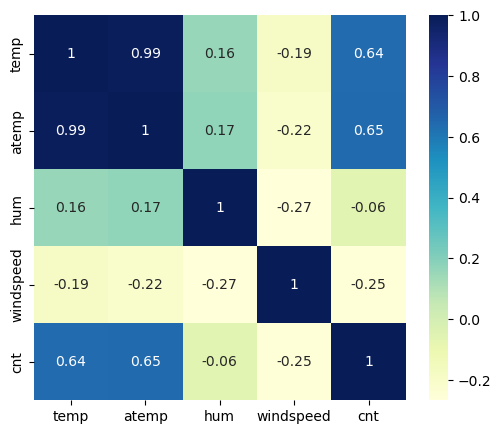

In [40]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (6, 5))
sns.heatmap(df_train[numerical_columns].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### -- Dividing into X and Y sets for the model building

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

## Part 2: Model Building

### 2.1. RFE

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 10
lm_rfe = LinearRegression()
lm_rfe.fit(X_train, y_train)
# running RFE
rfe = RFE(estimator=lm_rfe, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 12),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'Sat', 'Sun', 'Light', 'Mist'],
      dtype='object')


In [46]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### 2.2. Building a linear model

#### --  Build a function for frequent used codes

In [47]:
# Build and summary of linear model

import statsmodels.api as sm 

def build_linear_model_summary(X_tr, y_tr):
    
    # Adding a constant variable 
    X_tr_lm = sm.add_constant(X_tr)
    
    # Running the linear model
    lm = sm.OLS(y_tr,X_tr_lm).fit() 
    
    #Output the summary of linear model
    print(lm.summary())
    
    return lm,X_tr_lm

In [48]:
# Calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(X_tr):  
    # Calculate the VIFs for the model
    vif = pd.DataFrame()
    X = X_tr
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### --  Building 1st  model

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [50]:
# Running and summary the linear model
_ , _ = build_linear_model_summary(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.13e-191
Time:                        20:29:32   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

#### --  Dropping the variable `holiday`  with high P-value and building the 2rd model

In [51]:
#drop "holiday"
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [52]:
# Running and summary the 2nd linear model
_ , _ = build_linear_model_summary(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.13e-191
Time:                        20:29:35   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

#### --  Checking the VIF

In [53]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jul', 'Sep', 'Sat', 'Sun', 'Light', 'Mist'],
      dtype='object')

In [54]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_new)

      Features    VIF
3          hum  32.14
2         temp  18.98
1   workingday  18.41
10         Sat   4.91
4    windspeed   4.90
5       spring   4.80
11         Sun   4.76
7       winter   3.71
6       summer   3.03
13        Mist   2.31
0           yr   2.09
8          Jul   1.60
9          Sep   1.38
12       Light   1.25


#### --  Drop the variable `hum` with high VIF, build the 3rd model, check VIF

In [55]:
#drop "hum"
X_train_new = X_train_new.drop(['hum'], axis=1)

In [56]:
# Running and summary the 3rd linear model
_ , _ = build_linear_model_summary(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          5.73e-189
Time:                        20:29:40   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

In [57]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_new)

      Features    VIF
1   workingday  16.19
2         temp  12.73
3    windspeed   4.75
9          Sat   4.45
10         Sun   4.21
4       spring   3.82
6       winter   2.80
5       summer   2.75
0           yr   2.07
7          Jul   1.60
12        Mist   1.58
8          Sep   1.35
11       Light   1.09


#### --  Drop the variable `workingday` with high VIF, build the 4rd model, check VIF

In [58]:
#drop "workingday"
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [59]:
# Running and summary the 3rd linear model
_ , _  = build_linear_model_summary(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.01e-186
Time:                        20:29:41   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

In [60]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_new)

     Features   VIF
1        temp  5.17
2   windspeed  4.62
4      summer  2.23
3      spring  2.11
0          yr  2.07
5      winter  1.82
6         Jul  1.59
11       Mist  1.55
7         Sep  1.33
8         Sat  1.22
9         Sun  1.21
10      Light  1.08


#### --  Drop the variable `Sat` with high P-value, build the 5rd model, check VIF

In [61]:
#drop "Sat"
X_train_new = X_train_new.drop(['Sat'], axis=1)

In [62]:
# Running and summary the 3rd linear model
lm,X_train_lm = build_linear_model_summary(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.65e-187
Time:                        20:29:42   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.889      0.0

In [63]:
# Calculate the VIFs for the new model
calculate_VIF(X_train_new)

     Features   VIF
1        temp  5.13
2   windspeed  4.60
4      summer  2.22
3      spring  2.09
0          yr  2.07
5      winter  1.80
6         Jul  1.59
10       Mist  1.55
7         Sep  1.33
8         Sun  1.17
9       Light  1.08


### 2.2. Residual Analysis of the train data

In [64]:
# Predict the target variable
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

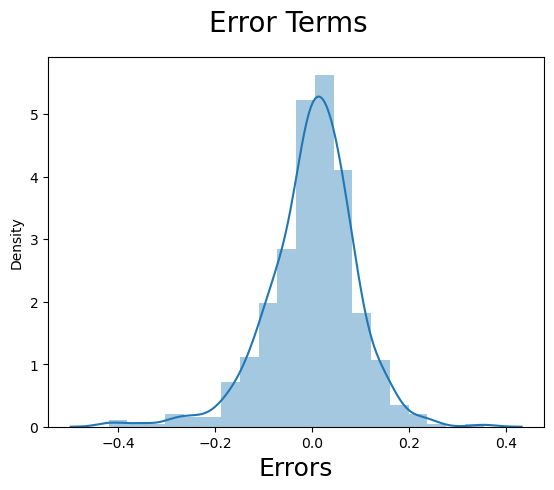

In [65]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### 2.3. Making Predictions Using the Final Model

#### -- Applying the scaling on the test sets

In [66]:
# Transform the numerical columns of the test data using the scaler
df_test[numerical_columns] = scaler_train.transform(df_test[numerical_columns])

In [67]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### -- Dividing into X_test and y_test

In [68]:
y_test = df_test.pop('cnt')
X_test_con = sm.add_constant(df_test)

In [69]:
drop_columns = ['holiday',
 'workingday',
 'atemp',
 'hum',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Mon',
 'Sat',
 'Thu',
 'Tue',
 'Wed']
X_test_con = X_test_con.drop(drop_columns,axis = 1)

In [70]:
# Making predictions using the model
y_pred_m = lm.predict(X_test_con)

## Part 3: Model Evaluation

In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_m)
print(r2)

0.805407680173852


Text(0, 0.5, 'y_pred')

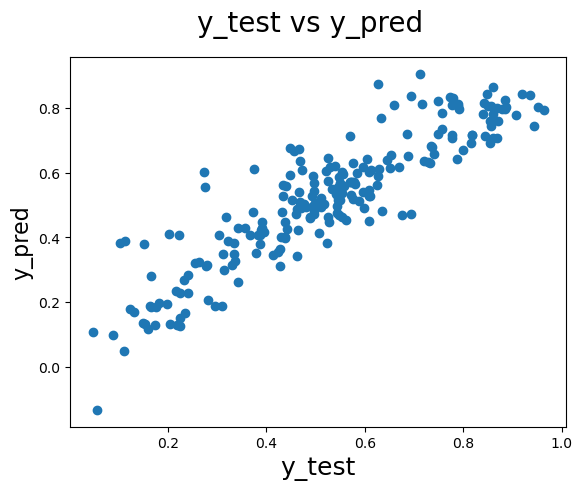

In [72]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    